<a href="https://colab.research.google.com/github/priyeshroy10155/computervision/blob/main/Traffic_Signs_Detection_YOLOv5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# from google.colab import files #code for import kaggle data
# !pip install -q kaggle

In [3]:
# uploaded = files.upload()

In [4]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# #chancge mode
# !chmod 600 ~/.kaggle/kaggle.json

In [5]:
# !kaggle datasets download -d valentynsichkar/traffic-signs-dataset-in-yolo-format
# !kaggle datasets download -d valentynsichkar/traffic-signs-dataset-in-yolo-format

In [6]:
# %cd /content/drive/MyDrive/YOLO

In [7]:
# from zipfile import ZipFile
# file_name="/content/traffic-signs-dataset-in-yolo-format.zip"
# with ZipFile(file_name,"r") as zip:
#   zip.extractall()
#   print("done u")

In [8]:
# pip install tensorflow==2.3.1

In [9]:
# pip install tensorboard==2.4.1

In [10]:
# pip install torch

In [11]:
import torch # YOLOv5 implemented using pytorch

In [12]:
from IPython.display import Image #this is to render predictions

In [13]:
# !git clone https://github.com/ultralytics/yolov5

In [14]:
!pip install -r /content/drive/MyDrive/YOLO/yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Divide data sets in train and val folder**




In [15]:
import os
from random import choice
import shutil

In [16]:
# #arrays to store file names
# imgs =[]
# xmls =[]

# #setup dir names
# trainPath = '/content/drive/MyDrive/YOLO/Data_sets/Train'
# valPath = '/content/drive/MyDrive/YOLO/Data_sets/val'
# crsPath = '/content/drive/MyDrive/YOLO/ts' #dir where images and annotations stored

# #setup ratio (val ratio = rest of the files in origin dir after splitting into train and test)
# train_ratio = 0.8
# val_ratio = 0.2


# #total count of imgs
# totalImgCount = len(os.listdir(crsPath))/2

# #soring files to corresponding arrays
# for (dirname, dirs, files) in os.walk(crsPath):
#     for filename in files:
#         if filename.endswith('.txt'):
#             xmls.append(filename)
#         else:
#             imgs.append(filename)


# #counting range for cycles
# countForTrain = int(len(imgs)*train_ratio)
# countForVal = int(len(imgs)*val_ratio)
# print("training images are : ",countForTrain)
# print("Validation images are : ",countForVal)

In [17]:
# trainimagePath = '/content/drive/MyDrive/YOLO/Data_sets/Train/images'
# trainlabelPath = '/content/drive/MyDrive/YOLO/Data_sets/Train/labels'
# valimagePath = '/content/drive/MyDrive/YOLO/Data_sets/val/images'
# vallabelPath = '/content/drive/MyDrive/YOLO/Data_sets/val/labels'
# #cycle for train dir
# for x in range(countForTrain):

#     fileJpg = choice(imgs) # get name of random image from origin dir
#     fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

#     #move both files into train dir
#     #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
#     #shutil.move(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))
#     shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
#     shutil.copy(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))


#     #remove files from arrays
#     imgs.remove(fileJpg)
#     xmls.remove(fileXml)



# #cycle for test dir   
# for x in range(countForVal):

#     fileJpg = choice(imgs) # get name of random image from origin dir
#     fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

#     #move both files into train dir
#     #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
#     #shutil.move(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
#     shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
#     shutil.copy(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    
#     #remove files from arrays
#     imgs.remove(fileJpg)
#     xmls.remove(fileXml)

# #rest of files will be validation files, so rename origin dir to val dir
# #os.rename(crsPath, valPath)
# shutil.move(crsPath, valPath) 

***Create dataset.yaml***

move the dataset’s dataset.yaml file to the /content/yolov5/data directory.
This file contains information required by YOLO to train the model on the custom data.


In [18]:
!python /content/drive/MyDrive/YOLO/yolov5/train.py --img 415 --batch 16 --epochs 100 --data /content/drive/MyDrive/YOLO/data.yaml --weights /content/drive/MyDrive/YOLO/yolov5s.pt --cache

train: weights=/content/drive/MyDrive/YOLO/yolov5s.pt, cfg=, data=/content/drive/MyDrive/YOLO/data.yaml, hyp=drive/MyDrive/YOLO/yolov5/data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=drive/MyDrive/YOLO/yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-55-g632bf48 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cl

**At the end of the training, two files should be saved in yolov5/runs/train/exp/weights: last.pt and best.pt. We’ll use best.pt.**

**Explore the metrics recorded during training, I suggest you use TensorBoard, a very interactive exploration tool:**

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

**Let’s explore now how confident our model is. We can plot a validation batch obtained during training and inspect the confidence score of each label**

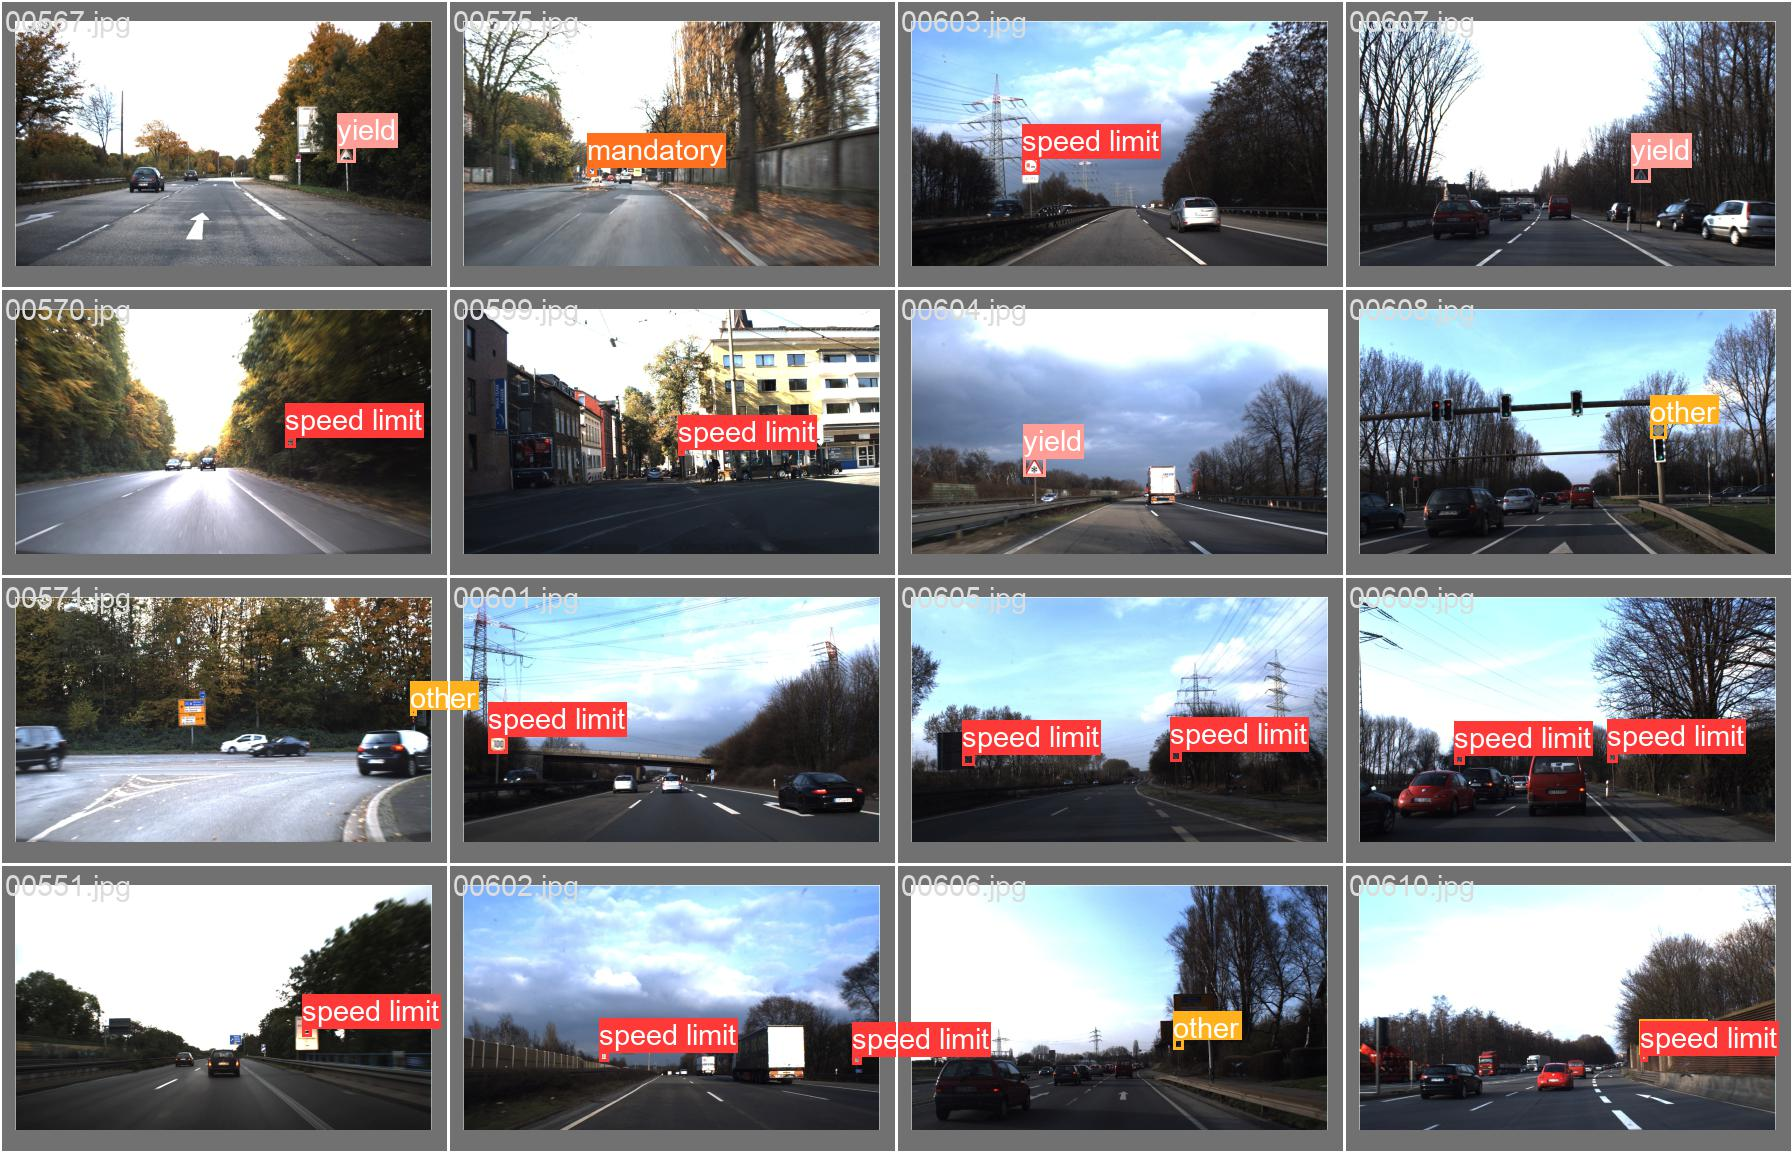

In [20]:
Image(filename='/content/drive/MyDrive/YOLO/yolov5/runs/train/exp3/val_batch2_labels.jpg', width=1000)

In [21]:
#!python detect.py --source runs/train/exp/testimg.jpg --weights runs/train/exp/weights/best.pt --conf 0.25

!python /content/drive/MyDrive/YOLO/yolov5/detect.py --source /content/drive/MyDrive/YOLO/Data_sets/val/images/00000.jpg --weights /content/drive/MyDrive/YOLO/yolov5/runs/train/exp3/weights/best.pt

detect: weights=['/content/drive/MyDrive/YOLO/yolov5/runs/train/exp3/weights/best.pt'], source=/content/drive/MyDrive/YOLO/Data_sets/val/images/00000.jpg, data=drive/MyDrive/YOLO/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=drive/MyDrive/YOLO/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-55-g632bf48 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/YOLO/Data_sets/val/images/00000.jpg: 384x640 1 speed limit, 1 yield, 20.6ms
Speed: 0.6ms pre-process, 20.6ms inference, 2.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to driv

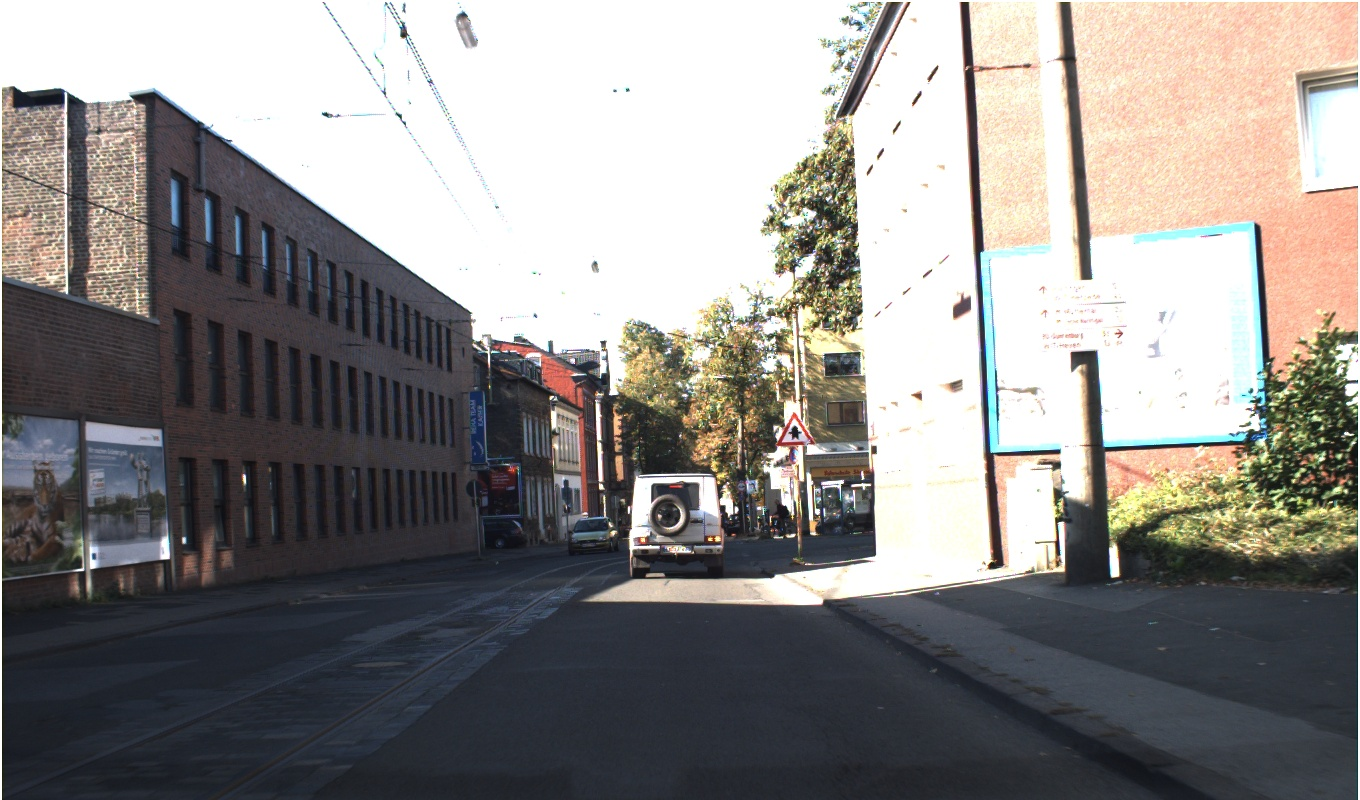

In [22]:
Image(filename='/content/drive/MyDrive/YOLO/Data_sets/val/images/00000.jpg', width=416)